In [1]:

from matplotlib import pyplot as plt
import nltk
import pandas as pd
import numpy as np
import sys
import os
import seaborn

from data_loader import DataLoader

In [2]:
#load kindle_store 5-core data
loader = DataLoader(DataLoader.data_path1)
table1 = loader.load_table()

#load digital_music 5-core data
loader = DataLoader(DataLoader.data_path2)
table2 = loader.load_table()

d:\study\NTU_LEARN\AI6122 TEXT MANAGEMENT & PROCESSING\project\data_loader.py:14: FutureWarning: Starting with pandas version 2.0 all arguments of read_json except for the argument 'path_or_buf' will be keyword-only.
  self.table = pd.read_json(data_path, 'records', lines = True);
d:\study\NTU_LEARN\AI6122 TEXT MANAGEMENT & PROCESSING\project\data_loader.py:14: FutureWarning: Starting with pandas version 2.0 all arguments of read_json except for the argument 'path_or_buf' will be keyword-only.
  self.table = pd.read_json(data_path, 'records', lines = True);


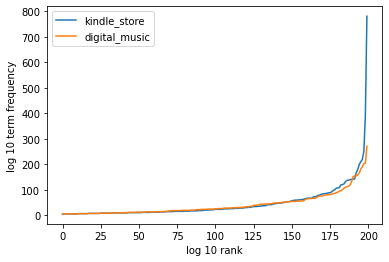

In [3]:
#dataset overview
def count_asin(table):
    asin = {}
    for row in table.iterrows():
        key = row[1]['asin']
        if  key in asin.keys():
            asin[key] += 1

        else:
            asin[key] = 1
    return asin.values()

x1 = count_asin(table1)
x2 = count_asin(table2)
plt.plot(sorted(x1))
plt.plot(sorted(x2))

plt.xlabel('log 10 rank')
plt.ylabel('log 10 term frequency')
plt.legend(['kindle_store','digital_music'])

In [19]:
#Writing Style

print(table1['reviewText'].to_numpy()[np.random.randint(len(table1))])
print('==================================================================')
print(table2['reviewText'].to_numpy()[np.random.randint(len(table2))])
print('==================================================================')
print(table1['reviewText'].to_numpy()[np.random.randint(len(table1))])
print('==================================================================')
print(table2['reviewText'].to_numpy()[np.random.randint(len(table2))])

This is the first book I have read of Lyn Gardner.  I was feeling a little bah humbug and saw this little treasure in my search for some new reading.I was pleasantly surprised, the story is at times funny, witty, charming and doesn't shy on the sexy times :)I read it in one go and I would recommend it if you want to smile and feel warm and fuzzy.I enjoyed the story so much I am about to start another of Lyn's books, ICE.
I wanted to dislike this album when it dropped but I didn't I actually liked it a lot. I still do, I think it is a really strong debut record and the production is super tight.
As brilliant and warm as the Alexander family themselves. I loved it! Can't wait to read the continuing stories of this family. Thanks for the fun read Minx, and well done. Very well done indeed!!!
This is by far my favorite Eagles album,yes it includes the radio staples Lyin' Eyes,Take It To The Limit and the classic title track that were played to death on the radio,great song sbut the real re

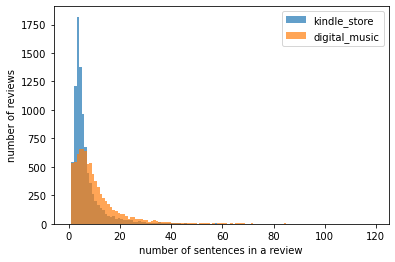

In [4]:
#sentence segmentation
counter1 = [len(nltk.sent_tokenize(review)) for review in table1['reviewText']]
counter2 = [len(nltk.sent_tokenize(review)) for review in table2['reviewText']]

plt.hist(counter1, bins = range(max(counter1 + counter2) + 1), alpha = 0.7)
plt.hist(counter2, bins = range(max(counter1 + counter2) + 1), alpha = 0.7)
plt.xlabel('number of sentences in a review')
plt.ylabel('number of reviews')
plt.legend(['kindle_store','digital_music'])

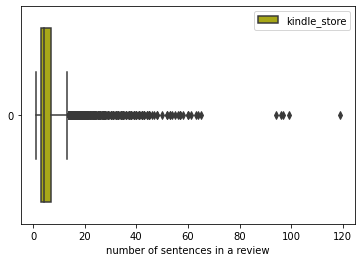

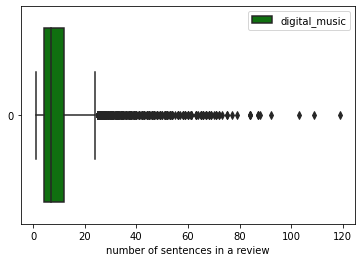

In [19]:
#sentence segmentation continued
plt.figure(0)
seaborn.boxplot(counter1, orient= 'h', color = 'y')
plt.xlabel('number of sentences in a review')
plt.legend(['kindle_store'])
plt.figure(1)
seaborn.boxplot(counter2, orient= 'h', color = 'g')
plt.xlabel('number of sentences in a review')
plt.legend(['digital_music'])

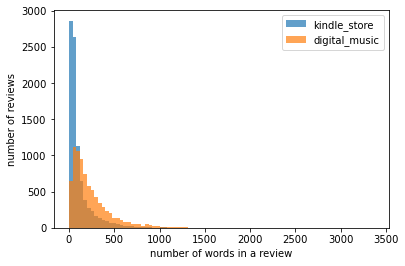

In [34]:
#word tokenization

def tokenize_and_count(table):
    tokenized = [nltk.word_tokenize(review) for review in table['reviewText']]
    counter = [len(review) for review in tokenized]
    return tokenized, counter

tokenized1, counter1 = tokenize_and_count(table1)
tokenized2, counter2 = tokenize_and_count(table2)

plt.hist(counter1, bins = range(0, max(counter1 + counter2) + 1, 40), alpha = 0.7)
plt.hist(counter2, bins = range(0, max(counter1 + counter2) + 1, 40), alpha = 0.7)
plt.xlabel('number of words in a review')
plt.ylabel('number of reviews')
plt.legend(['kindle_store','digital_music'])

C:\Users\lky\AppData\Local\Temp\ipykernel_65492\2890275796.py:40: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.arange(len(x1))), np.log10(x1))
C:\Users\lky\AppData\Local\Temp\ipykernel_65492\2890275796.py:41: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.arange(len(x2))), np.log10(x2))


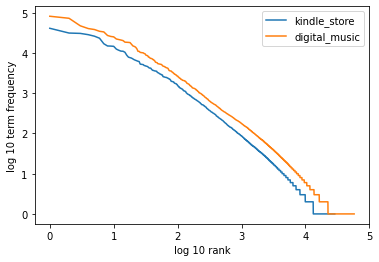

In [46]:
#stemming
from nltk.stem.snowball import SnowballStemmer

def casefold(tokenized):
    for i in range(len(tokenized)):

        tokenized[i] = [token.casefold() for token in tokenized[i]]
    return tokenized

def count_wf(table):
    counter = {}
    for review in table:
        for token in review:
            if token not in counter.keys():
                counter[token] = 1
            else:
                counter[token] += 1
    return counter

def stem_and_count_wf(table):
    counter = {}
    stemmer = SnowballStemmer("english")

    for review in table:
        for token in review:
            token = stemmer.stem(token)
            if token not in counter.keys():
                counter[token] = 1
            else:
                counter[token] += 1
    return counter

counter1 = count_wf(casefold(tokenized1))
counter2 = count_wf(casefold(tokenized2))

x1 = sorted(list(counter1.values()), reverse = True)
x2 = sorted(list(counter2.values()), reverse = True)
x1 = np.array(x1)
x2 = np.array(x2)
plt.plot(np.log10(np.arange(len(x1))), np.log10(x1))
plt.plot(np.log10(np.arange(len(x2))), np.log10(x2))

plt.xlabel('log 10 rank')
plt.ylabel('log 10 term frequency')
plt.legend(['kindle_store','digital_music'])

C:\Users\lky\AppData\Local\Temp\ipykernel_65492\129004388.py:11: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.arange(len(x1))), np.log10(x1), 'g')
C:\Users\lky\AppData\Local\Temp\ipykernel_65492\129004388.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.arange(len(x2))), np.log10(x2), 'r')
C:\Users\lky\AppData\Local\Temp\ipykernel_65492\129004388.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.arange(len(x3))), np.log10(x3), 'g--')
C:\Users\lky\AppData\Local\Temp\ipykernel_65492\129004388.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(np.arange(len(x4))), np.log10(x4), 'r--')


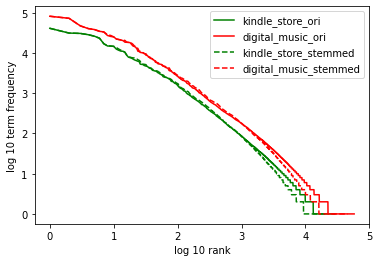

In [47]:
#stemming continued

counter1 = stem_and_count_wf(tokenized1)
counter2 = stem_and_count_wf(tokenized2)

x3 = sorted(list(counter1.values()), reverse = True)
x4 = sorted(list(counter2.values()), reverse = True)
x3 = np.array(x3)
x4 = np.array(x4)

plt.plot(np.log10(np.arange(len(x1))), np.log10(x1), 'g')
plt.plot(np.log10(np.arange(len(x2))), np.log10(x2), 'r')
plt.plot(np.log10(np.arange(len(x3))), np.log10(x3), 'g--')
plt.plot(np.log10(np.arange(len(x4))), np.log10(x4), 'r--')

plt.xlabel('log 10 rank')
plt.ylabel('log 10 term frequency')
plt.legend(['kindle_store_ori','digital_music_ori','kindle_store_stemmed','digital_music_stemmed'])

In [ ]:
#pos tagging
import spacy
from spacy import displacy

K = 5
for i in range(K):
    sents = nltk.sent_tokenize(table1['reviewText'].to_numpy()[np.random.randint(200)])

    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sents[np.random.randint(len(sents))])
    displacy.render(doc, style = "dep", )

In [12]:
#pos tagging continued
from spacy import displacy
import nltk
from nltk.tokenize import TreebankWordTokenizer as twt

def visualize_pos(text):
    pos_tags = ["PRON", "VERB", "NOUN", "ADJ", "ADP",
                "ADV", "CONJ", "DET", "NUM", "PRT"]
    
    # Tokenize text and pos tag each token
    tokens = twt().tokenize(text)
    tags = nltk.pos_tag(tokens, tagset = "universal")

    # Get start and end index (span) for each token
    span_generator = twt().span_tokenize(text)
    spans = [span for span in span_generator]

    # Create dictionary with start index, end index, 
    # pos_tag for each token
    ents = []
    for tag, span in zip(tags, spans):
        if tag[1] in pos_tags:
            ents.append({"start" : span[0], 
                         "end" : span[1], 
                         "label" : tag[1] })

    doc = {"text" : text, "ents" : ents}

    colors = {"PRON": "blueviolet",
              "VERB": "lightpink",
              "NOUN": "turquoise",
              "ADJ" : "lime",
              "ADP" : "khaki",
              "ADV" : "orange",
              "CONJ" : "cornflowerblue",
              "DET" : "forestgreen",
              "NUM" : "salmon",
              "PRT" : "yellow"}
    
    options = {"ents" : pos_tags, "colors" : colors}
    
    displacy.render(doc, 
                    style = "ent", 
                    options = options, 
                    manual = True,
                   )

K = 5
for i in range(K):
    sents = nltk.sent_tokenize(table1['reviewText'].to_numpy()[np.random.randint(200)])

    visualize_pos(sents[np.random.randint(len(sents))])
    

In [48]:
#Indicative Words
from nltk.corpus import stopwords

def is_word(str):
    if len(str) <= 1:
        return False
    for char in str:
        if not char.isalpha():
            return False
    return True 

#casefold
#stemming
def calculate_words(tokenized):
    word_table = {}
    total_words = 0
    #stemmer = SnowballStemmer("english")
    lemma = nltk.wordnet.WordNetLemmatizer()
    
    for review in tokenized:
        
        words_and_tags = nltk.pos_tag(review)
        for word,tag in  words_and_tags :
            wntag = tag[0].lower()
            if wntag in ['a', 'r', 'n', 'v'] and is_word(word):
                word = lemma.lemmatize(word, wntag)         
                total_words += 1
                if word in word_table.keys() and word not in stopwords.words('english'):
                    word_table[word] += 1
                else:
                    word_table[word] = 1

    return total_words, word_table

def get_prob_list(sum, word_table):
    prob_table = {}
    for key, val in word_table.items():
        prob_table[key] = val/sum

    return prob_table

def calculate_relative_entropy(prob_table1, prob_table2):

    RE_list1 = []
    RE_list2 = []
    for key, val in prob_table1.items():

        if key in prob_table2.keys():

            relative_entropy1 = val * np.log(val / prob_table2[key])
            RE_list1.append((key, relative_entropy1))

            relative_entropy2 = prob_table2[key] * np.log(prob_table2[key] / val)
            RE_list2.append((key, relative_entropy2))

    RE_list1.sort(key = lambda x:x[1], reverse = True)
    RE_list2.sort(key = lambda x:x[1], reverse = True)

    return RE_list1, RE_list2

In [49]:
#Indicative Words
sum1, word_table1 = calculate_words(tokenized1[:])
sum2, word_table2 = calculate_words(tokenized2[:])
print('1')
prob_list1 = get_prob_list(sum1, word_table1)
prob_list2 = get_prob_list(sum2, word_table2)
print('2')
ind_list1, ind_list2 = calculate_relative_entropy(prob_list1, prob_list2)

1
2


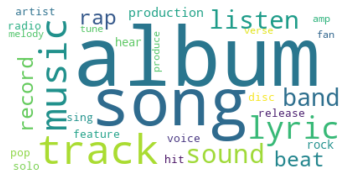

In [57]:
#Indicative Words Visualization
from wordcloud import WordCloud
K = 30

weighted = {}
for i in range(K):
    weighted[ind_list2[i][0]] = ind_list2[i][1]

wc = WordCloud(background_color="white", max_words=1000)
# generate word cloud
wc.generate_from_frequencies(weighted)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()